In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-dataset/training.1600000.processed.noemoticon.csv
/kaggle/input/sentiment-analysis-dataset/train.csv
/kaggle/input/sentiment-analysis-dataset/testdata.manual.2009.06.14.csv
/kaggle/input/sentiment-analysis-dataset/test.csv


In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
train_data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv',encoding='unicode_escape');
test_data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv',encoding='latin1');

In [8]:
train_data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [9]:
test_data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [10]:
train_data.isna().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [11]:
test_data.isna().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [12]:
train_data = train_data.dropna()
test_data = test_data.dropna()

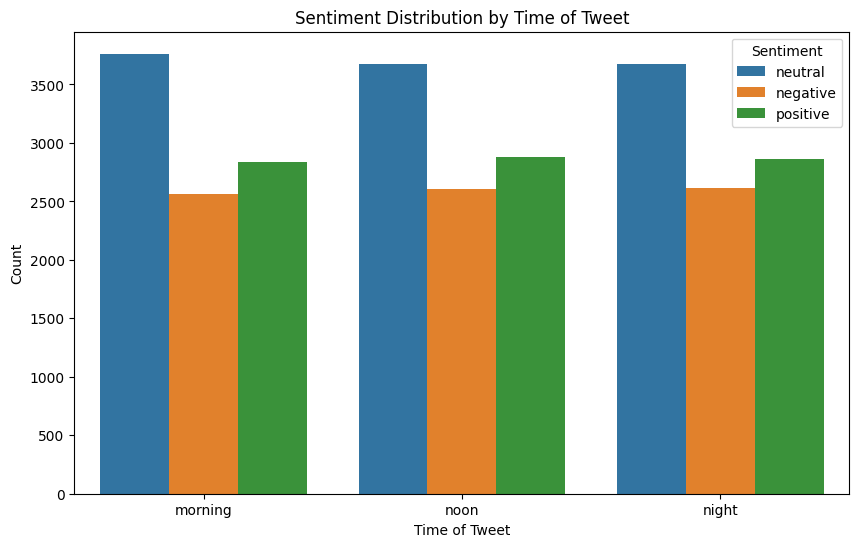

In [13]:
df = train_data[['Time of Tweet','sentiment']]
plt.figure(figsize=(10, 6))
sns.countplot(x='Time of Tweet', hue='sentiment', data=df)
plt.title('Sentiment Distribution by Time of Tweet')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

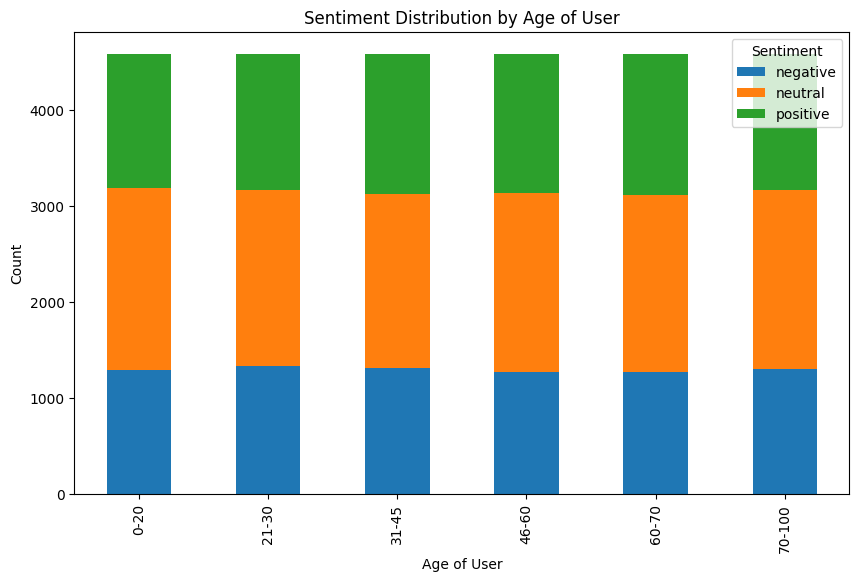

In [14]:
df = train_data[['Age of User','sentiment']]


age_sentiment = pd.crosstab(df['Age of User'], df['sentiment'])


age_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Age of User')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

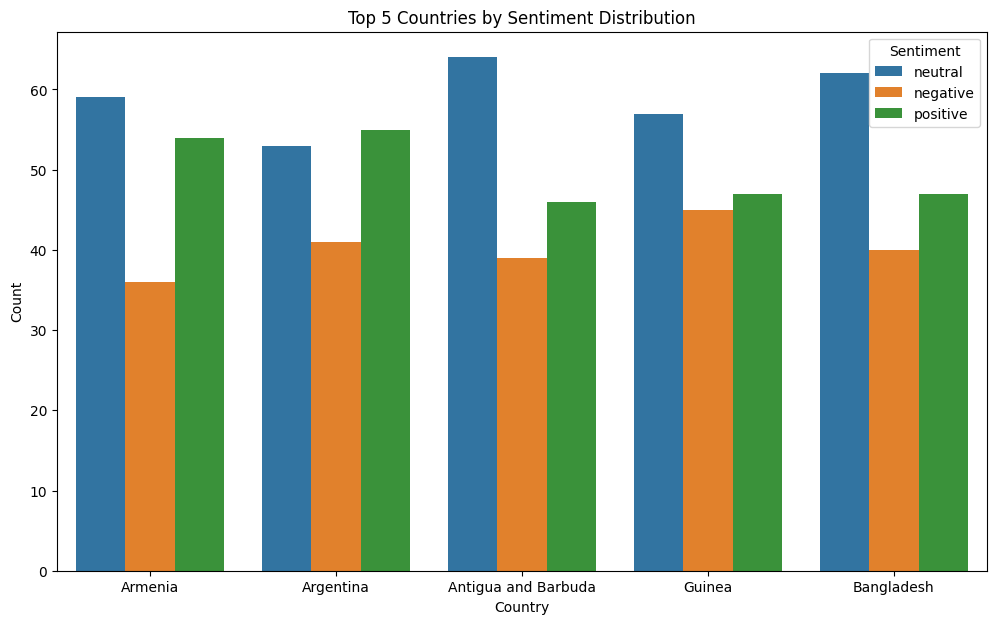

In [15]:
df = train_data[['Country','sentiment']]

plt.figure(figsize=(12, 7))
sns.countplot(x='Country', hue='sentiment', data=df, order=df['Country'].value_counts().iloc[:5].index)
plt.title('Top 5 Countries by Sentiment Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

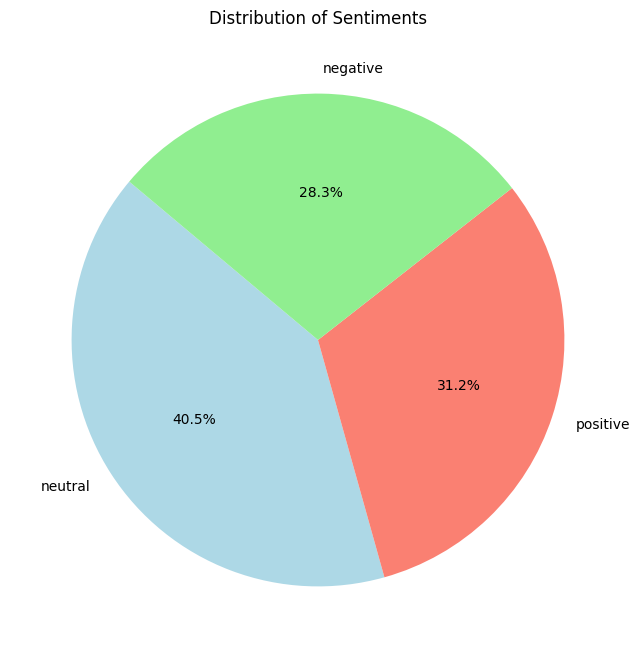

In [16]:
sentiment_counts = train_data['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiments')
plt.show()

# Naive Bayes Model


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [18]:
X_train = train_data['text']
y_train = train_data['sentiment']
X_test = test_data['text']
y_test = test_data['sentiment']

In [19]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [20]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [21]:
y_pred = nb.predict(X_test_vec)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [23]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.60      0.64      1001
     neutral       0.59      0.69      0.64      1430
    positive       0.74      0.66      0.70      1103

    accuracy                           0.66      3534
   macro avg       0.67      0.65      0.66      3534
weighted avg       0.66      0.66      0.66      3534



# LSTM Model

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-05-20 04:17:57.683307: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 04:17:57.683473: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 04:17:57.964824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['text'])
text_sequences = tokenizer.texts_to_sequences(train_data['text'])
text_data = pad_sequences(text_sequences, maxlen=50)

ohe = OneHotEncoder()
categorical_data = ohe.fit_transform(train_data[['Time of Tweet', 'Age of User', 'Country']]).toarray()

scaler = StandardScaler()
numerical_data = scaler.fit_transform(train_data[['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']])

target = pd.get_dummies(train_data['sentiment']).values

In [26]:
X_train_text, X_dev_text, X_train_cat, X_dev_cat, X_train_num, X_dev_num, y_train, y_dev = train_test_split(
    text_data, categorical_data, numerical_data, target, test_size=0.2, random_state=42)

In [27]:
text_input = Input(shape=(50,))
text_embed = Embedding(input_dim=10000, output_dim=128)(text_input)
text_out = LSTM(64)(text_embed)

cat_input = Input(shape=(categorical_data.shape[1],))
num_input = Input(shape=(numerical_data.shape[1],))

merged = concatenate([text_out, cat_input, num_input])

dense = Dense(64, activation='relu')(merged)
output = Dense(3, activation='softmax')(dense)

model = Model(inputs=[text_input, cat_input, num_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit([X_train_text, X_train_cat, X_train_num], y_train, epochs=20, batch_size=32)

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5273 - loss: 0.9335
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7806 - loss: 0.5459
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8387 - loss: 0.4190
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8744 - loss: 0.3275
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9078 - loss: 0.2462
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9297 - loss: 0.1910
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9473 - loss: 0.1439
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9562 - loss: 0.1164
Epoch 9/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9686 - loss: 0.0904
Epoch 10/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9771 - loss: 0.0665
Epoch 11/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9815 - loss: 0.0536
Epoch 12/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step

In [28]:
def preprocess_and_predict(df, model, tokenizer, ohe, scaler):
    predictions = []
    indices = []

    for idx, row in df.iterrows():
        # Check for nulls in the columns needed for each input type
        if pd.isnull(row['text']) or pd.isna(row['text']):
            continue  # Skip this row if text data is missing

        # Prepare text data
        seq = tokenizer.texts_to_sequences([row['text']])
        text_data = pad_sequences(seq, maxlen=50)

        # Prepare categorical data
        cat_features = ['Time of Tweet', 'Age of User', 'Country']
        if pd.isnull(row[cat_features]).any():
            continue  # Skip this row if any categorical data is missing

        cat_data = ohe.transform(pd.DataFrame([row[cat_features]], columns=cat_features)).toarray()

        # Prepare numerical data
        num_features = ['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
        if pd.isnull(row[num_features]).any():
            continue  # Skip this row if any numerical data is missing

        num_data = scaler.transform(pd.DataFrame([row[num_features]], columns=num_features))

        pred = model.predict([text_data, cat_data, num_data], verbose=0)
        predicted_class = np.argmax(pred, axis=1)
        predictions.append(predicted_class)
        indices.append(idx)

    return predictions, indices

In [30]:
predicted_labels, valid_indices = preprocess_and_predict(test_data, model, tokenizer, ohe, scaler)
actual_labels = test_data.loc[valid_indices, 'sentiment']
actual_labels_encoded = pd.get_dummies(actual_labels).values

In [31]:
actual_labels_encoded = pd.get_dummies(actual_labels).values
actual_labels_class = np.argmax(actual_labels_encoded, axis=1)
report = classification_report(actual_labels_class, np.array(predicted_labels).flatten(), target_names=['negative', 'neutral', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.65      0.71      0.68      1001
     neutral       0.66      0.64      0.65      1430
    positive       0.76      0.72      0.74      1103

    accuracy                           0.69      3534
   macro avg       0.69      0.69      0.69      3534
weighted avg       0.69      0.69      0.69      3534

